Given the root of a binary tree, replace the value of each node in the tree with the sum of all its cousins' values.

Two nodes of a binary tree are cousins if they have the same depth with different parents.

Return the root of the modified tree.

Note that the depth of a node is the number of edges in the path from the root node to it.

 

Example 1:

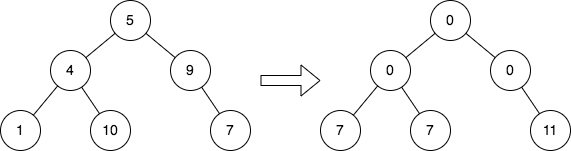

Input: root = [5,4,9,1,10,null,7]
Output: [0,0,0,7,7,null,11]
Explanation: The diagram above shows the initial binary tree and the binary tree after changing the value of each node.
- Node with value 5 does not have any cousins so its sum is 0.
- Node with value 4 does not have any cousins so its sum is 0.
- Node with value 9 does not have any cousins so its sum is 0.
- Node with value 1 has a cousin with value 7 so its sum is 7.
- Node with value 10 has a cousin with value 7 so its sum is 7.
- Node with value 7 has cousins with values 1 and 10 so its sum is 11.

Example 2:

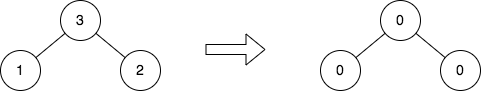

Input: root = [3,1,2]
Output: [0,0,0]
Explanation: The diagram above shows the initial binary tree and the binary tree after changing the value of each node.
- Node with value 3 does not have any cousins so its sum is 0.
- Node with value 1 does not have any cousins so its sum is 0.
- Node with value 2 does not have any cousins so its sum is 0.

 

Constraints:

    The number of nodes in the tree is in the range [1, 105].
    1 <= Node.val <= 104



In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def replaceValueInTree(self, root: Optional[TreeNode]) -> Optional[TreeNode]:
        if not root:
            return root

        root.val = 0

        def dfs(node):
            node.children_sum = 0
            if node.left:
                node.children_sum += node.left.val
                node.left.parent = node
                dfs(node.left)
            if node.right:
                node.children_sum += node.right.val
                node.right.parent = node
                dfs(node.right)
            
        dfs(root)
        q = deque([root])
        while q:
            n = len(q)
            curr_sum = sum(node.val for node in q)
            for _ in range(n):
                node = q.popleft()
                if hasattr(node, "parent"):
                    node.val = curr_sum - node.parent.children_sum
                if node.left:
                    q.append(node.left)
                if node.right:
                    q.append(node.right)
        return root


In [ ]:
class Solution:
    def replaceValueInTree(self, root):
        if not root:
            return root
        node_queue = deque([root])
        level_sums = []

        # First BFS: Calculate sum of nodes at each level
        while node_queue:
            level_sum = 0
            level_size = len(node_queue)
            for _ in range(level_size):
                current_node = node_queue.popleft()
                level_sum += current_node.val
                if current_node.left:
                    node_queue.append(current_node.left)
                if current_node.right:
                    node_queue.append(current_node.right)
            level_sums.append(level_sum)

        # Second BFS: Update each node's value to sum of its cousins
        node_queue.append(root)
        level_index = 1
        root.val = 0  # Root has no cousins
        while node_queue:
            level_size = len(node_queue)
            for _ in range(level_size):
                current_node = node_queue.popleft()

                sibling_sum = (
                    current_node.left.val if current_node.left else 0
                ) + (current_node.right.val if current_node.right else 0)

                if current_node.left:
                    current_node.left.val = (
                        level_sums[level_index] - sibling_sum
                    )
                    node_queue.append(current_node.left)
                if current_node.right:
                    current_node.right.val = (
                        level_sums[level_index] - sibling_sum
                    )
                    node_queue.append(current_node.right)
            level_index += 1

        return root

In [ ]:
class Solution:
    def replaceValueInTree(self, root):
        if root is None:
            return root
        node_queue = deque()
        node_queue.append(root)
        current_level_sum = root.val

        while node_queue:
            level_size = len(node_queue)
            next_level_sum = 0

            for _ in range(level_size):
                current_node = node_queue.popleft()
                # Update node value to cousin sum
                current_node.val = current_level_sum - current_node.val

                # Calculate sibling sum
                sibling_sum = (
                    0 if current_node.left is None else current_node.left.val
                ) + (
                    0 if current_node.right is None else current_node.right.val
                )

                if current_node.left is not None:
                    next_level_sum += (
                        current_node.left.val
                    )  # Accumulate next level sum
                    current_node.left.val = (
                        sibling_sum  # Update left child's value
                    )
                    node_queue.append(
                        current_node.left
                    )  # Add to queue for next level
                if current_node.right is not None:
                    next_level_sum += (
                        current_node.right.val
                    )  # Accumulate next level sum
                    current_node.right.val = (
                        sibling_sum  # Update right child's value
                    )
                    node_queue.append(
                        current_node.right
                    )  # Add to queue for next level

            # Update current level sum for next iteration
            current_level_sum = next_level_sum
        return root